In [1]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option("display.max_rows", 101)
import os
# print(os.listdir("./input"))
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
import cv2
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, AvgPool2D
from keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten ,Dropout, Activation, Conv2D, MaxPool2D , MaxPooling2D, AveragePooling2D, AvgPool2D
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.regularizers import l2
import tensorflow as tf 

import pickle
from numpy import loadtxt
from keras.models import load_model
import keras
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("./train.csv")

In [3]:
train_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [4]:
train = train_df.ImageId_ClassId.str.split('_', expand=True)

In [104]:
train.head()

,ImageId,isdefect,image_matrix
0,0002cc93b.jpg,1,0
1,00031f466.jpg,0,0
2,000418bfc.jpg,0,0
3,000789191.jpg,0,0
4,0007a71bf.jpg,1,0


In [6]:
train['EncodedPixels'] = train_df.EncodedPixels

In [7]:
train.head()

,0,1,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,NaN
2,0002cc93b.jpg,3,NaN
3,0002cc93b.jpg,4,NaN
4,00031f466.jpg,1,NaN


In [8]:
train.columns = ['ImageId','ClassId','EncodedPixels']

In [9]:
train['isdefect'] = train.EncodedPixels.apply(lambda x:0 if x is np.nan else 1)

In [10]:
train.head()

,ImageId,ClassId,EncodedPixels,isdefect
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,1
1,0002cc93b.jpg,2,NaN,0
2,0002cc93b.jpg,3,NaN,0
3,0002cc93b.jpg,4,NaN,0
4,00031f466.jpg,1,NaN,0


In [11]:
train = train.groupby(by='ImageId').sum()

In [12]:
train.head()

,isdefect
ImageId,
0002cc93b.jpg,1
00031f466.jpg,0
000418bfc.jpg,0
000789191.jpg,0
0007a71bf.jpg,1


In [13]:
train.reset_index(inplace=True)

In [14]:
train.isdefect.value_counts()

1    6239
0    5902
2     425
3       2
Name: isdefect, dtype: int64

In [15]:
train.isdefect = train.isdefect.apply(lambda x:1 if x>0 else 0)

In [16]:
train.isdefect.value_counts()

1    6666
0    5902
Name: isdefect, dtype: int64

# spliting data 80%

In [ ]:
x1_train= train[train.isdefect==0]
len(x1_train)

In [ ]:
# 80%
x1_train=x1_train.sample(n = 4722)
len(x1_train)

In [ ]:
x2_train= train[train.isdefect==1]
len(x2_train)

In [ ]:
x2_train=x2_train.sample(n = 5333)
x2_train.reset_index(inplace=True,drop= True)
len(x2_train)

In [ ]:
new_list=pd.concat([x1_train,x2_train ], ignore_index=True)

In [ ]:
len(new_list)

In [ ]:
new_list = shuffle(new_list)
new_list.reset_index(inplace=True,drop= True)

In [ ]:
new_list.head()

In [ ]:
images_list = []
for idx, image_name in tqdm(enumerate(new_list.ImageId)):
    image = cv2.imread('./train_images/' + image_name,cv2.IMREAD_GRAYSCALE )
    images_list.append(image)

In [ ]:
X= images_list
y= new_list.isdefect

In [ ]:
y = np.array(y)
X =np.array(X).reshape(-1,256,1600,1)

# model 1

### best results
####  full whole data, grayscale , scaled :  val_loss: 0.3232 - val_accuracy: 0.8660

#### 80% of the data,  RGB , not scaled : val_loss: 0.4239 - val_accuracy: 0.8185

#### 80% of the data, grayscale, not scaled : val_loss: 0.3510 - val_accuracy: 0.8702 , epoch 9

#### 80% of the data, grayscale, not scaled, added an extra convlution layer  ( model.add(Conv2D(64,kernel_size=(5,5),padding="same",kernel_regularizer=l2(0.0005),activation="relu",strides=(1, 1))))

In [ ]:
# NAME="TB"
# tensorboard=TensorBoard(log_dir="/Users/yezy/misk/capstone_ideas/severstal-steel-defect/{}".format(NAME))

In [99]:
model = tf.keras.Sequential()
model.add(Conv2D(32,kernel_size=(5,5),input_shape=X.shape[1:],kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(5,5),kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64,kernel_size=(5,5),padding="same",kernel_regularizer=l2(0.0005),activation="relu",strides=(1, 1)))


model.add(Conv2D(128,kernel_size=(5,5),kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.25))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [100]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 126, 798, 32)      832       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 63, 399, 32)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 30, 198, 64)       51264     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 99, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 15, 99, 64)        102464    
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 6, 48, 128)        204928    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 3, 24, 128)      

In [101]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [103]:
model.fit(
    x=X,
    y=y,
    batch_size=None,
    epochs=30,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=6),
             ModelCheckpoint(filepath='best_model_5 saved ussing Checkpoint.h5', monitor='val_loss', save_best_only=True)]
                ,
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

Train on 8044 samples, validate on 2011 samples
Epoch 1/30
8044/8044 [==============================] - 551s 69ms/sample - loss: 0.6263 - accuracy: 0.7092 - val_loss: 0.4960 - val_accuracy: 0.7742
Epoch 2/30
8044/8044 [==============================] - 558s 69ms/sample - loss: 0.4824 - accuracy: 0.7925 - val_loss: 0.4381 - val_accuracy: 0.8125
Epoch 3/30
8044/8044 [==============================] - 553s 69ms/sample - loss: 0.4376 - accuracy: 0.8149 - val_loss: 0.4457 - val_accuracy: 0.7996
Epoch 4/30
8044/8044 [==============================] - 559s 69ms/sample - loss: 0.3979 - accuracy: 0.8375 - val_loss: 0.4242 - val_accuracy: 0.8120
Epoch 5/30
8044/8044 [==============================] - 538s 67ms/sample - loss: 0.3531 - accuracy: 0.8569 - val_loss: 0.3921 - val_accuracy: 0.8419
Epoch 6/30
8044/8044 [==============================] - 561s 70ms/sample - loss: 0.3343 - accuracy: 0.8702 - val_loss: 0.3918 - val_accuracy: 0.8419
Epoch 7/30
8044/8044 [==============================] - 53

In [48]:
# model.save("binary_classifier_86.h5")

In [49]:
# ggg = tf.keras.models.load_model('binary_classifier_86.h5')

In [57]:
# ggg.summary()

In [56]:
# score = ggg.evaluate(X, y, verbose=0)
# print("%s: %.2f%%" % (ggg.metrics_names[1], score[1]*100))

# model 2

In [28]:
NAME="TB_2"
tensorboard=TensorBoard(log_dir="/Users/yezy/misk/capstone_ideas/severstal-steel-defect/{}".format(NAME))

In [29]:
model_2 = tf.keras.Sequential()
model_2.add(Conv2D(32,kernel_size=(5,5),padding='same',input_shape=X.shape[1:],kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_2.add(MaxPooling2D(pool_size=(2,2)))


model_2.add(Conv2D(64,kernel_size=(3,3),padding='same',kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(128,kernel_size=(3,3),padding='same',kernel_regularizer=l2(0.0005),activation="relu",strides=(1, 1)))
#model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())
model_2.add(Dense(500,kernel_constraint=max_norm(4)))
model_2.add(Dropout(0.3))
model_2.add(Activation("relu"))

model_2.add(Dense(250,kernel_constraint=max_norm(4)))
model_2.add(Dropout(0.2))
model_2.add(Activation("relu"))

model_2.add(Dense(50,kernel_constraint=max_norm(4)))
model_2.add(Dropout(0.2))
model_2.add(Activation("relu"))

model_2.add(Dense(1))
model_2.add(Activation("sigmoid"))

In [30]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 800, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 400, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 200, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 100, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 100, 128)      73856     
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 500)               1

In [31]:
model_2.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [32]:
model_2.fit(
    x=X,
    y=y,
    batch_size=None,
    epochs=30,
    verbose=1,
    callbacks= [EarlyStopping(monitor='val_loss', patience=6),
             ModelCheckpoint(filepath='best_model_2 saved ussing Checkpoint.h5', monitor='val_loss', save_best_only=True)
                ,tensorboard],
    validation_split=0.15,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

Train on 7479 samples, validate on 1320 samples
Epoch 1/30
7479/7479 [==============================] - 665s 89ms/sample - loss: 0.6803 - accuracy: 0.5929 - val_loss: 0.6966 - val_accuracy: 0.6515
Epoch 2/30
7479/7479 [==============================] - 681s 91ms/sample - loss: 0.5291 - accuracy: 0.7355 - val_loss: 0.4704 - val_accuracy: 0.7530
Epoch 3/30
7479/7479 [==============================] - 705s 94ms/sample - loss: 0.4632 - accuracy: 0.7663 - val_loss: 0.4537 - val_accuracy: 0.7652
Epoch 4/30
7479/7479 [==============================] - 707s 94ms/sample - loss: 0.4298 - accuracy: 0.7859 - val_loss: 0.4197 - val_accuracy: 0.7917
Epoch 5/30
7479/7479 [==============================] - 715s 96ms/sample - loss: 0.4088 - accuracy: 0.8017 - val_loss: 0.4595 - val_accuracy: 0.7750
Epoch 6/30
7479/7479 [==============================] - 715s 96ms/sample - loss: 0.3628 - accuracy: 0.8325 - val_loss: 0.4536 - val_accuracy: 0.7864
Epoch 7/30
7479/7479 [==============================] - 70

# Model 3

### here i split the data to be more effecint to work with  ,changed the order between the activation function and the dropout, increased the strides, decresed the max pooling and increased the max norm to be 5 

In [30]:
NAME="TB_3"
tensorboard=TensorBoard(log_dir="/Users/yezy/misk/capstone_ideas/severstal-steel-defect/{}".format(NAME))

In [31]:
model_3 = tf.keras.Sequential()
model_3.add(Conv2D(32,kernel_size=(5,5),input_shape=X.shape[1:],kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2,2)))


model_3.add(Conv2D(64,kernel_size=(5,5),kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(128,kernel_size=(5,5),kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Flatten())
model_3.add(Dense(1000))
model_3.add(Dropout(0.25))
model_3.add(Activation("relu"))

model_3.add(Dense(1))
model_3.add(Activation("sigmoid"))

In [32]:
model_3.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
#validation_split=0.15 and not 0.2
model_3.fit(
    x=X,
    y=y,
    batch_size=None,
    epochs=30,
    verbose=1,
    callbacks= [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model_3 saved ussing Checkpoint.h5', monitor='val_loss', save_best_only=True)
                ,tensorboard],
    validation_split=0.15,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

Train on 7479 samples, validate on 1320 samples
Epoch 1/30
7479/7479 [==============================] - 502s 67ms/sample - loss: 0.6392 - accuracy: 0.6434 - val_loss: 0.5040 - val_accuracy: 0.7636
Epoch 2/30
7479/7479 [==============================] - 519s 69ms/sample - loss: 0.4829 - accuracy: 0.7665 - val_loss: 0.5191 - val_accuracy: 0.7364
Epoch 3/30
7479/7479 [==============================] - 529s 71ms/sample - loss: 0.4396 - accuracy: 0.7934 - val_loss: 0.4677 - val_accuracy: 0.7705
Epoch 4/30
7479/7479 [==============================] - 538s 72ms/sample - loss: 0.4033 - accuracy: 0.8119 - val_loss: 0.4390 - val_accuracy: 0.7818
Epoch 5/30
7479/7479 [==============================] - 540s 72ms/sample - loss: 0.3802 - accuracy: 0.8207 - val_loss: 0.3967 - val_accuracy: 0.8265
Epoch 6/30
7479/7479 [==============================] - 531s 71ms/sample - loss: 0.3460 - accuracy: 0.8417 - val_loss: 0.3879 - val_accuracy: 0.8265
Epoch 7/30
7479/7479 [==============================] - 53

Screen Shot 2019-12-11 at 00.48.45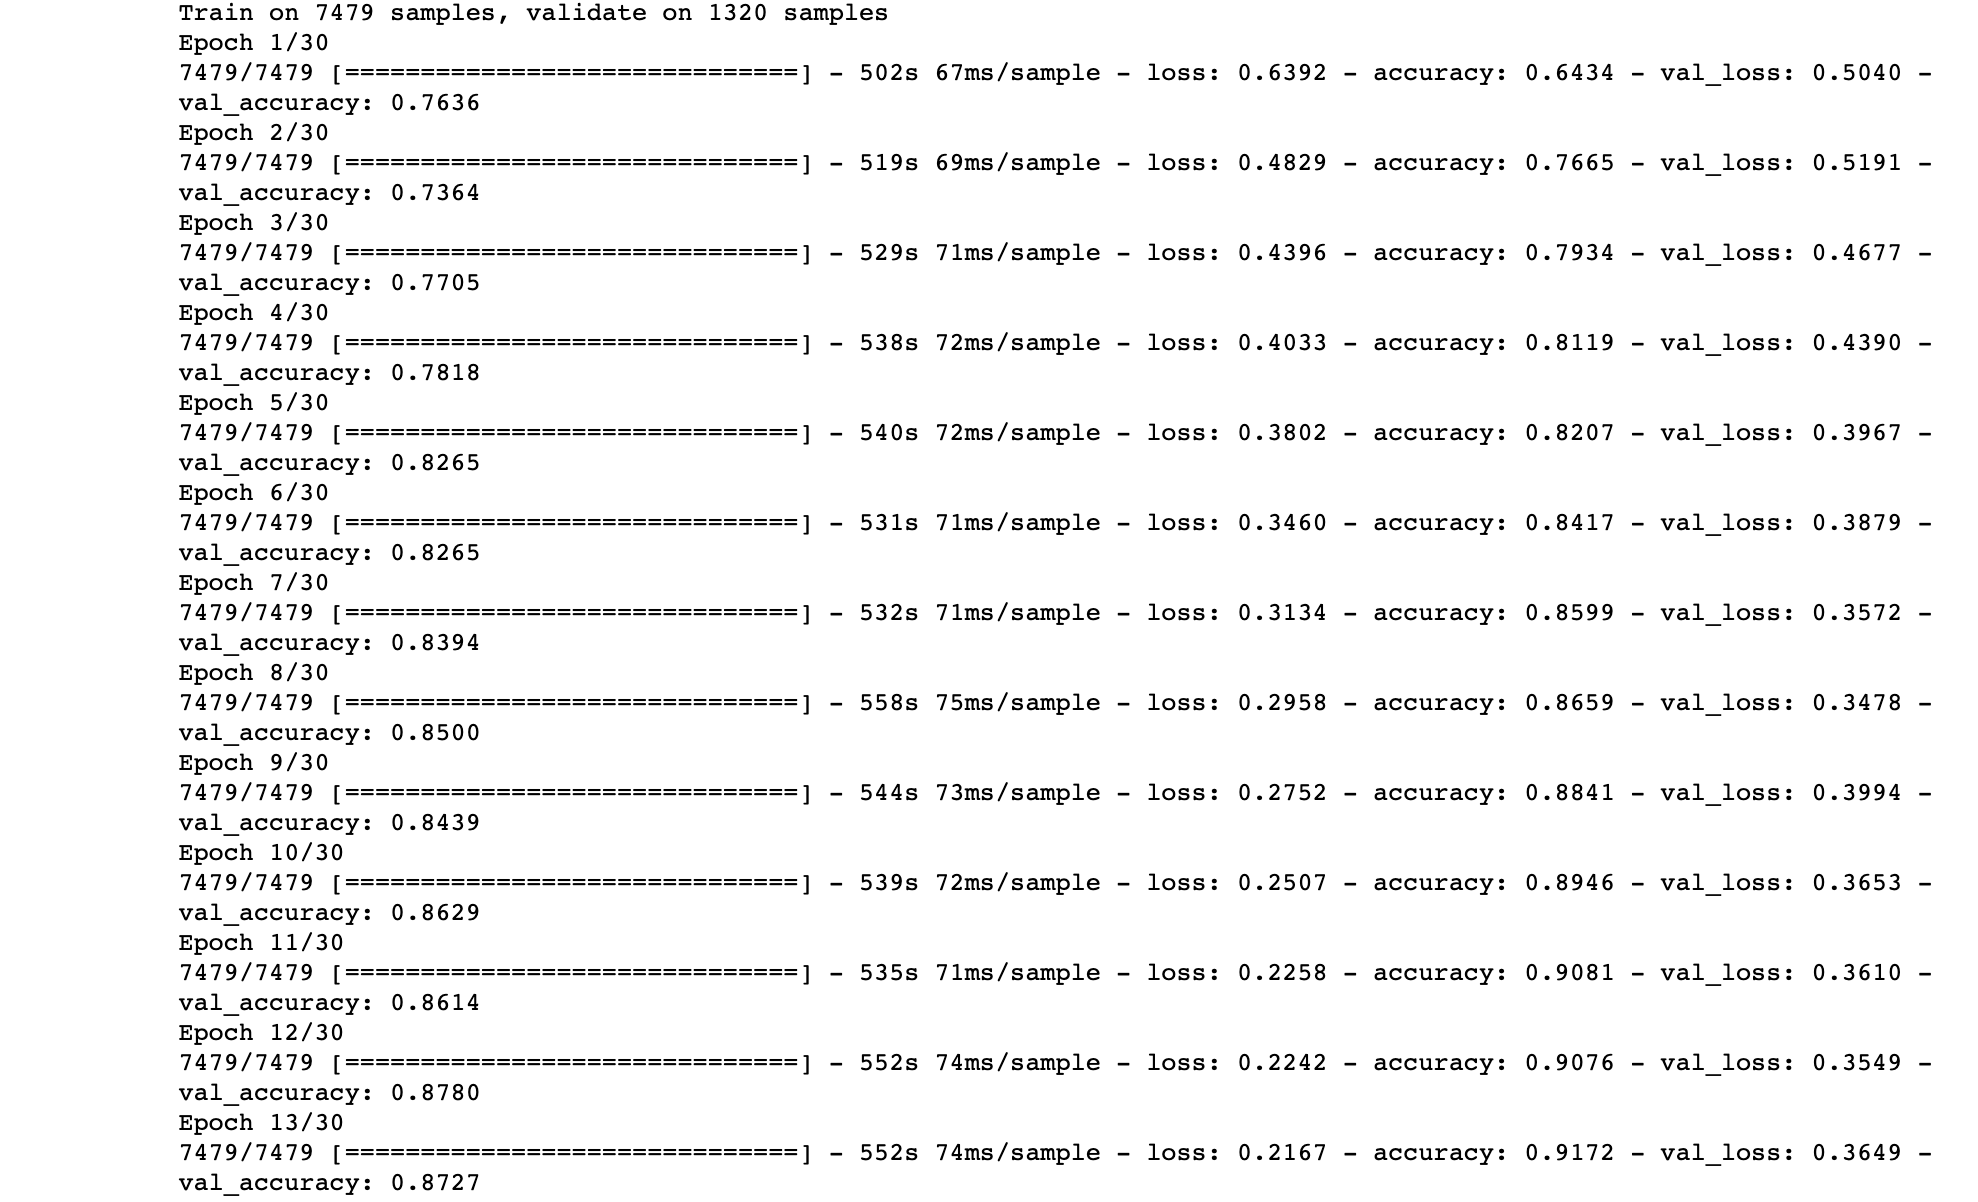

# model 4

In [28]:
NAME="TB_4"
tensorboard=TensorBoard(log_dir="/Users/yezy/misk/capstone_ideas/severstal-steel-defect/{}".format(NAME))

In [51]:
# padding everywhere, kernel_constraint=max_norm(4) in every dense layer, extra dense layer (500), drop out increased to (0.3)
model_4 = tf.keras.Sequential()
model_4.add(Conv2D(32,kernel_size=(5,5),padding='same',input_shape=X.shape[1:],kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_4.add(MaxPooling2D(pool_size=(2,2)))


model_4.add(Conv2D(64,kernel_size=(5,5),padding='same',kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Conv2D(128,kernel_size=(5,5),padding='same',kernel_regularizer=l2(0.0005),activation="relu",strides=(2, 2)))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Flatten())
model_4.add(Dense(1000,kernel_constraint=max_norm(4)))
model_4.add(Dropout(0.3))
model_4.add(Activation("relu"))

model_4.add(Dense(500,kernel_constraint=max_norm(4)))
model_4.add(Dropout(0.3))
model_4.add(Activation("relu"))


model_4.add(Dense(1))
model_4.add(Activation("sigmoid"))

In [53]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 128, 800, 32)      832       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 400, 32)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 200, 64)       51264     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 100, 64)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 50, 128)        204928    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 25, 128)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12800)            

In [30]:
model_4.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [31]:
model_4.fit(
    x=X,
    y=y,
    batch_size=None,
    epochs=30,
    verbose=1,
    callbacks= [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model_4 saved ussing Checkpoint.h5', monitor='val_loss', save_best_only=True)
                ,tensorboard],
    validation_split=0.15,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

Train on 7479 samples, validate on 1320 samples
Epoch 1/30
7479/7479 [==============================] - 521s 70ms/sample - loss: 0.6336 - accuracy: 0.6459 - val_loss: 0.5102 - val_accuracy: 0.7424
Epoch 2/30
7479/7479 [==============================] - 608s 81ms/sample - loss: 0.5091 - accuracy: 0.7466 - val_loss: 0.4634 - val_accuracy: 0.7591
Epoch 3/30
7479/7479 [==============================] - 620s 83ms/sample - loss: 0.4385 - accuracy: 0.7801 - val_loss: 0.4246 - val_accuracy: 0.7917
Epoch 4/30
7479/7479 [==============================] - 580s 78ms/sample - loss: 0.4198 - accuracy: 0.7969 - val_loss: 0.3993 - val_accuracy: 0.8015
Epoch 5/30
7479/7479 [==============================] - 577s 77ms/sample - loss: 0.4068 - accuracy: 0.8034 - val_loss: 0.4477 - val_accuracy: 0.7720
Epoch 6/30
7479/7479 [==============================] - 569s 76ms/sample - loss: 0.3804 - accuracy: 0.8148 - val_loss: 0.4080 - val_accuracy: 0.8152
Epoch 7/30
7479/7479 [==============================] - 56

Screen Shot 2019-12-11 at 00.49.44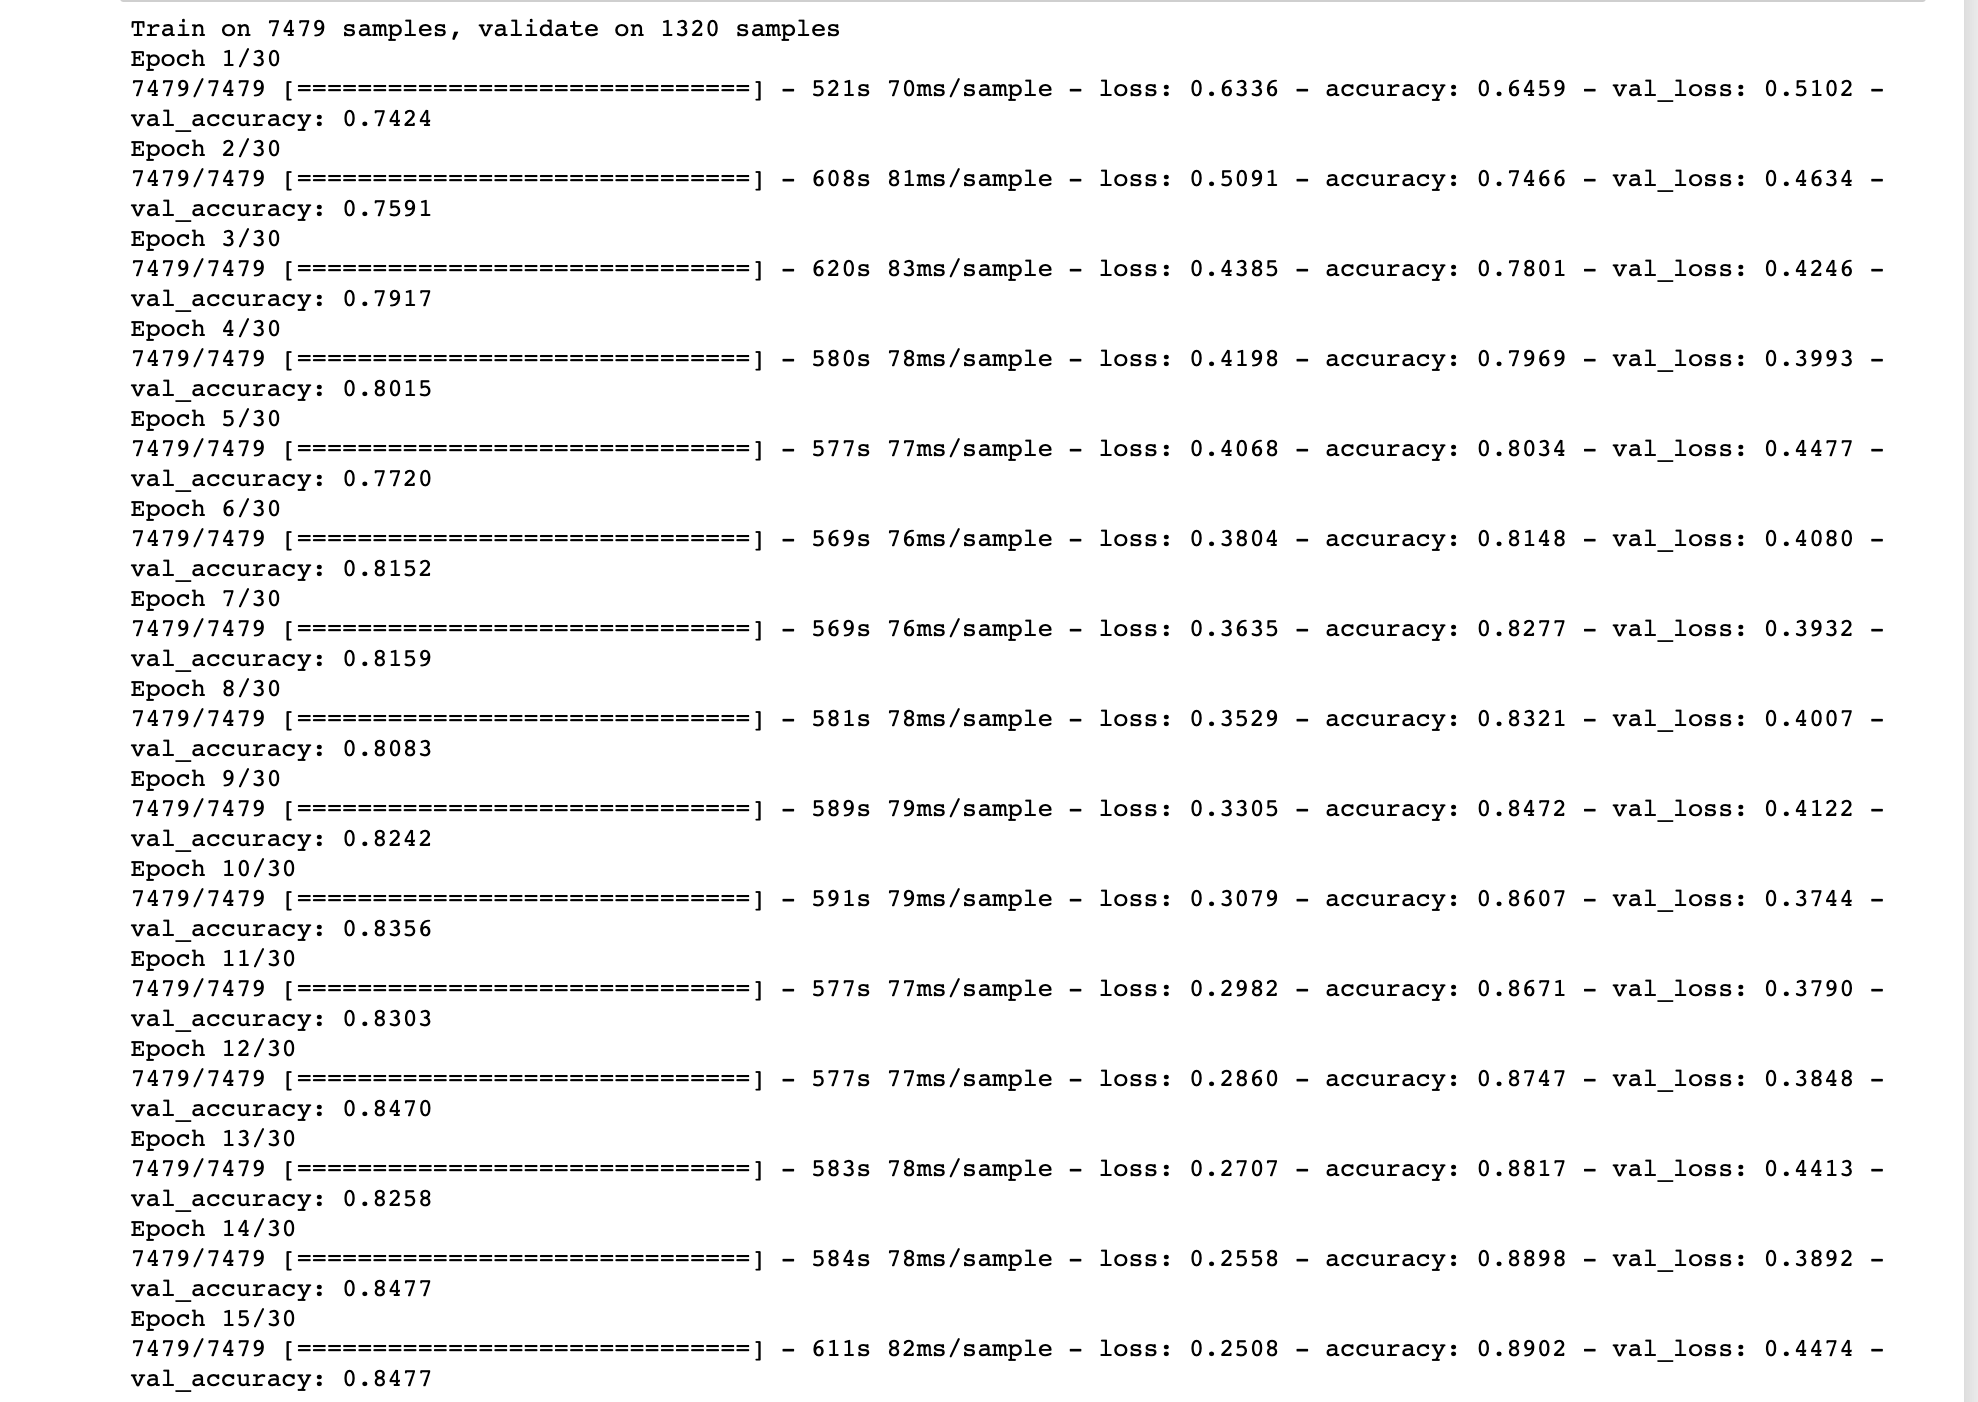

# model 5 

In [18]:
x1_train= train[train.isdefect==0]
len(x1_train)

5902

In [19]:
# 80%
x1_train=x1_train.sample(n = 4722)
len(x1_train)

4722

In [20]:
x2_train= train[train.isdefect==1]
len(x2_train)

6666

In [21]:
x2_train=x2_train.sample(n = 5333)
x2_train.reset_index(inplace=True,drop= True)
len(x2_train)

5333

In [22]:
new_list=pd.concat([x1_train,x2_train ], ignore_index=True)

In [23]:
len(new_list)

10055

In [24]:
new_list = shuffle(new_list)
new_list.reset_index(inplace=True,drop= True)

In [25]:
new_list.head()

,ImageId,isdefect,image_matrix
0,d5f4e7481.jpg,1,0
1,5b3c0123f.jpg,0,0
2,b845c99d9.jpg,1,0
3,2d332f374.jpg,0,0
4,0da1c044f.jpg,1,0


In [51]:
images_list = []
for idx, image_name in tqdm(enumerate(new_list.ImageId)):
    image = cv2.imread('./train_images/' + image_name,cv2.IMREAD_GRAYSCALE )
    images_list.append(image)

10055it [01:31, 109.54it/s]


In [52]:
X= images_list
y= new_list.isdefect

In [53]:
y = np.array(y)
X =np.array(X).reshape(-1,256,1600,1)
#X = X/255.0

In [40]:
# df_dict = {'images':list(X),
#           'y':y}

In [41]:
# df = pd.DataFrame(df_dict)

In [42]:
# df.to_csv('std_x.csv', index=False)

In [59]:
#bilal = pd.read_csv("./std_x.csv")

In [63]:
#type(bilal.images[0])

In [64]:
#w=np.array(bilal.images.str.split('\n')[0])

In [65]:
#w

In [46]:
# bilal.images.astype(np.ndarray)

In [47]:
#np.save('معدلة', X)

In [48]:
# from tempfile import TemporaryFile
# outfile = TemporaryFile()

In [49]:
# np.save(nn, X)

In [ ]:
# ###Load into file
# with open("standerdized_X.pkl","wb") as f:
#     pickle.dump(m,f)

In [68]:
X.shape

(10055, 256, 1600, 1)

In [69]:
y.shape

(10055,)

In [29]:
# NAME="TB_5"
# tensorboard=TensorBoard(log_dir="/Users/yezy/misk/capstone_ideas/severstal-steel-defect/{}".format(NAME))

In [30]:
# no kernel_regularizer=l2(0.0005), onlt 2 convlution layers, and 2 dense layrs 
model_5 = tf.keras.Sequential()
model_5.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.01),padding='same',input_shape=X.shape[1:],activation="relu",strides=(2, 2)))
model_5.add(AveragePooling2D(pool_size=(2,2)))


model_5.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.01),padding='same',activation="relu",strides=(2, 2)))
#model_5.add(AveragePooling2D(pool_size=(2,2)))

model_5.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.01),padding='same',activation="relu",strides=(1, 1)))

model_5.add(Flatten())
model_5.add(Dense(500))
model_5.add(Dropout(0.3))
model_5.add(Activation("relu"))

model_5.add(Dense(200))
# model_5.add(Dropout(0.3))
# model_5.add(Activation("relu"))


model_5.add(Dense(1))
model_5.add(Activation("sigmoid"))

In [31]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 800, 64)      640       
_________________________________________________________________
average_pooling2d (AveragePo (None, 64, 400, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 200, 64)       36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 200, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 409600)            0         
_________________________________________________________________
dense (Dense)                (None, 500)               204800500 
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [32]:
model_5.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
model_5.fit(
    x=X,
    y=y,
    batch_size=None,
    epochs=30,
    verbose=1,
    callbacks= [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model_5 saved ussing Checkpoint.h5', monitor='val_loss', save_best_only=True)
                ,tensorboard],
    validation_split=0.1,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

Train on 7919 samples, validate on 880 samples
Epoch 1/30
7919/7919 [==============================] - 1387s 175ms/sample - loss: 3.9019 - accuracy: 0.6257 - val_loss: 2.4661 - val_accuracy: 0.7432
Epoch 2/30
7919/7919 [==============================] - 1655s 209ms/sample - loss: 2.3538 - accuracy: 0.6863 - val_loss: 2.1593 - val_accuracy: 0.7136
Epoch 3/30
7919/7919 [==============================] - 1697s 214ms/sample - loss: 1.9926 - accuracy: 0.7607 - val_loss: 1.8596 - val_accuracy: 0.7875
Epoch 4/30
7919/7919 [==============================] - 1799s 227ms/sample - loss: 1.7583 - accuracy: 0.7981 - val_loss: 1.7424 - val_accuracy: 0.7693
Epoch 5/30
7919/7919 [==============================] - 2027s 256ms/sample - loss: 1.5719 - accuracy: 0.8252 - val_loss: 1.6356 - val_accuracy: 0.7886
Epoch 6/30
5696/7919 [====================>.........] - ETA: 9:48 - loss: 1.4137 - accuracy: 0.8469

//anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
//anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


KeyboardInterrupt: 